In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from myprotos import string_int_label_map_pb2
##把class裡面的字串分割
from google.protobuf import text_format


In [2]:
##建立字典查詢Class對應的名稱
def LoadLabelmap(LabelMapPath, UseDisplayname=True):
    with open(LabelMapPath) as f:
        Labelmap_String = f.read()
    print('原本分割前的\n',Labelmap_String)
    LabelMap =string_int_label_map_pb2.StringIntLabelMap()
    ##text_format.Merge(字串,google的字串處理)
    text_format.Merge(Labelmap_String,LabelMap)
    print('分割後的字串\n',LabelMap.item[0])

    ##新增字典編號當key查詢文字
    LabelmapDict={}
    ##每個編號對應的文字
    for item in LabelMap.item:
        print(str(item.id)+ " " + item.display_name)
        if(UseDisplayname == True):
            LabelmapDict[item.id]=item.display_name
        else:
            LabelmapDict[item.id]=item.name
    return LabelmapDict
TestLabelMapDict = LoadLabelmap(r'data/mscoco_label_map.pbtxt',True)


原本分割前的
 item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  name: "/m/015qbp"
  id: 14
  display_name: "parking meter"
}
item {
  name: "/m/0cvnqh"
  id: 15
  display_name: "bench"
}
item {
  name: "/m/015p6"
  id: 16
  display_name: "bird"
}
item {
  name: "/m/01yrx"
  id: 17
  display_na

<Figure size 1440x576 with 0 Axes>

In [3]:
#讀取模型(ssd_mobilenet_v1_coco_2018_01_28.tar)
model = tf.saved_model.load(r'model\saved_model')

##輸入與輸出節點(signatures簽章動作)
print(model.signatures)
model = model.signatures['serving_default']
##輸入
print(model.inputs)

##輸出
#print(model.outputs)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
_SignatureMap({'serving_default': <ConcreteFunction pruned(inputs) at 0x264A8574D00>})
[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


存放的格式 <class 'numpy.ndarray'>


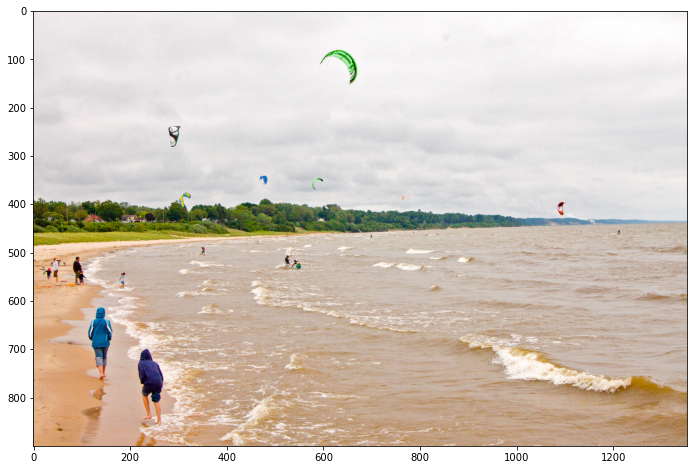

In [11]:
#讀取圖型
#openCV

##設定顯示繪圖區域大小
fig = plt.figure(figsize=(20,8))

cvimg=cv2.imread(r'test_images\image2.jpg')

##轉換前(註解轉換後可看不一樣的圖)
plt.imshow(cvimg)
##cv2的色彩是BGR跟其他相反的所以要正常顯示要轉換
cvimgRGB = cv2.cvtColor(cvimg,cv2.COLOR_BGR2RGB)
##轉換後
plt.imshow(cvimgRGB)

##存放的格式
print("存放的格式",type(cvimg))



##視窗名字,檔案
cv2.imshow("hello" , cvimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#使用模型推理

input_tensor = tf.convert_to_tensor(cvimgRGB)
print("轉換前3維陣列:",input_tensor.shape)
input_tensor = input_tensor[tf.newaxis,...]
print("轉換後4維陣列:",input_tensor.shape)
out = model(input_tensor)
print(out)



轉換前3維陣列: (900, 1352, 3)
轉換後4維陣列: (1, 900, 1352, 3)
{'detection_classes': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1., 38.,  1., 38., 38.,  1., 38.,  1.,  1.,  1.,  1., 38.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.9168781 , 0.8294538 , 0.7785058 , 0.76998395, 0.7555541 ,
        0.63422847, 0.60742277, 0.5890335 , 0.5124015 , 0.50146586,
        0.45562494, 0.41762325, 0.        , 0.        , 0.        ,
        0.        , 

檢測到的數量: tf.Tensor(12.0, shape=(), dtype=float32)
第 0 個類別是: tf.Tensor(1.0, shape=(), dtype=float32)
第 0 個準確度是: tf.Tensor(0.9168781, shape=(), dtype=float32)
第 0 個座標是: tf.Tensor([0.5538762 0.3942251 0.5931242 0.4091396], shape=(4,), dtype=float32)
第 1 個類別是: tf.Tensor(38.0, shape=(), dtype=float32)
第 1 個準確度是: tf.Tensor(0.8294538, shape=(), dtype=float32)
第 1 個座標是: tf.Tensor([0.38294718 0.3458244  0.40220192 0.35902956], shape=(4,), dtype=float32)
第 2 個類別是: tf.Tensor(1.0, shape=(), dtype=float32)
第 2 個準確度是: tf.Tensor(0.7785058, shape=(), dtype=float32)
第 2 個座標是: tf.Tensor([0.5741668  0.05766739 0.6233518  0.07475409], shape=(4,), dtype=float32)
第 3 個類別是: tf.Tensor(38.0, shape=(), dtype=float32)
第 3 個準確度是: tf.Tensor(0.76998395, shape=(), dtype=float32)
第 3 個座標是: tf.Tensor([0.07991441 0.43740913 0.16590245 0.5006029 ], shape=(4,), dtype=float32)
第 4 個類別是: tf.Tensor(38.0, shape=(), dtype=float32)
第 4 個準確度是: tf.Tensor(0.7555541, shape=(), dtype=float32)
第 4 個座標是: tf.Tensor([0.26564312 0.201123

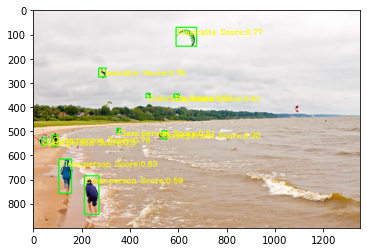

In [10]:
#匯出結果
##檢測數量 = out['num_detections'][第幾張圖片]
##檢測物件的類別 = out['detection_classes'][第幾張圖片][第幾個框檢測結果]  //如果有2個物件就選0或1
##檢測物件信心指數=out['detection_scores'][第幾張圖片][第幾個框檢測結果]
##檢測物件的框座標 = out['detection_boxes'][第幾張圖片][第幾個檢測結果][4個座標] // 4個座標為正規化(0~1)的分別為:y1,x1,y2,x2
print("檢測到的數量:",out['num_detections'][0])

for i in range(int(out['num_detections'][0])):
    print("第",i,"個類別是:",out['detection_classes'][0][i])
    print("第",i,"個準確度是:",out['detection_scores'][0][i])
    print("第",i,"個座標是:",out['detection_boxes'][0][i])
##把4個正規化的座標轉換成像素 數值X長或寬
for i in range(int(out['num_detections'][0])):
    ClassID = int(out['detection_classes'][0][i])
    Score = float(out['detection_scores'][0][i])
    ##過濾掉準確度低於0.5的
    if(Score >0.5):
        y1 =int(out['detection_boxes'][0][i][0] * cvimgRGB.shape[0])
        x1 =int(out['detection_boxes'][0][i][1] * cvimgRGB.shape[1])
        y2 =int(out['detection_boxes'][0][i][2] * cvimgRGB.shape[0])
        x2 =int(out['detection_boxes'][0][i][3] * cvimgRGB.shape[1])
        ##把框框座標畫出來
        ##cv2.rectangle(目標圖形,起始座標,終點座標,顏色,thickness=框線寬度)
        cv2.rectangle(cvimgRGB,(x1,y1),(x2,y2),(0,255,0),thickness=3)
        ##標示文字
        info = 'Class:{} Score:{}'.format(TestLabelMapDict[ClassID],round(Score,2))
        ##cv2.putText(目標圖片,文字,(x,y),字型,字體大小縮放,顏色(R,B,G),字體粗細)
        cv2.putText(cvimgRGB,info,(x1+5,y1+30),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0),2)
plt.imshow(cvimgRGB) 

cv2.imshow("Test" , cv2.cvtColor(cvimgRGB,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()